# Data Cleaning

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore

In [2]:
# bringing in data 
data = pd.read_csv("final_stocks_data.csv")
data.head(20)

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03 00:00:00+00:00,AAPL,177.830002,182.880005,177.710007,182.009995,179.273605,104487900.0
1,2022-01-03 00:00:00+00:00,XOM,61.240002,63.599998,61.209999,63.540001,57.618004,24282400.0
2,2022-01-03 00:00:00+00:00,VZ,52.070000,52.560001,51.980000,52.439999,43.423004,18240100.0
3,2022-01-03 00:00:00+00:00,V,217.520004,222.059998,217.009995,221.429993,216.793564,7694500.0
4,2022-01-03 00:00:00+00:00,TSLA,382.583344,400.356659,378.679993,399.926666,399.926666,103931400.0
5,2022-01-03 00:00:00+00:00,T,18.716011,19.320242,18.716011,19.206949,15.772990,76970210.0
6,2022-01-03 00:00:00+00:00,PG,161.690002,162.940002,159.880005,162.899994,151.253021,9317300.0
7,2022-01-03 00:00:00+00:00,PFE,58.500000,58.549999,56.340000,56.650002,50.231384,57219200.0
8,2022-01-03 00:00:00+00:00,PEP,172.199997,173.190002,170.570007,172.979996,160.040619,5488900.0
9,2022-01-03 00:00:00+00:00,NKE,167.529999,167.910004,163.309998,164.669998,158.935150,5670500.0


In [3]:
# Checking for nan
data.isna().sum()

Date         0
Symbol       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
data.isnull().sum()

Date         0
Symbol       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15030.000000,15030.000000,15030.000000,15030.000000,15030.000000,1.503000e+04
mean,151.041353,152.886914,149.192466,151.074372,147.677890,3.827113e+07
std,116.481232,118.023740,114.934290,116.514823,116.721466,9.567232e+07
min,10.971000,11.735000,10.813000,11.227000,11.216744,9.427000e+05
25%,60.317501,60.869999,59.925000,60.415000,57.215084,5.513700e+06
50%,124.389999,125.935001,122.814999,124.445000,118.864254,1.212425e+07
75%,186.334999,188.622505,184.284996,186.562500,184.053253,2.905650e+07
max,630.409973,633.890015,623.000000,633.659973,633.659973,1.543911e+09


In [6]:
data.columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [7]:
# removing for outliers
def remove_outliers_zscore(data, numerical_cols, threshold=3):
    """
    Removes outliers from the given DataFrame using the Z-score method.

    Parameters:
    -----------
    data : pd.DataFrame
        The input DataFrame containing the data.
    numerical_cols : list
        List of numerical columns to check for outliers.
    threshold : float, optional (default=3)
        The Z-score threshold to use for outlier detection.

    Returns:
    --------
    pd.DataFrame
        A new DataFrame with outliers removed.
    """
    # Calculate Z-scores for the numerical columns
    z_scores = data[numerical_cols].apply(zscore)

    # Create a mask for non-outliers (Z-scores within the threshold)
    mask = (np.abs(z_scores) < threshold).all(axis=1)

    # Return the filtered DataFrame without outliers
    return data[mask]

# calling the function
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data_cleaned = remove_outliers_zscore(data, numerical_cols)

print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")

# Optional: Save the cleaned data to a CSV




Original data shape: (15030, 8)
Cleaned data shape: (14293, 8)


In [8]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14293 entries, 0 to 15029
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14293 non-null  object 
 1   Symbol     14293 non-null  object 
 2   Open       14293 non-null  float64
 3   High       14293 non-null  float64
 4   Low        14293 non-null  float64
 5   Close      14293 non-null  float64
 6   Adj Close  14293 non-null  float64
 7   Volume     14293 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1005.0+ KB


In [9]:
data = data_cleaned

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14293 entries, 0 to 15029
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14293 non-null  object 
 1   Symbol     14293 non-null  object 
 2   Open       14293 non-null  float64
 3   High       14293 non-null  float64
 4   Low        14293 non-null  float64
 5   Close      14293 non-null  float64
 6   Adj Close  14293 non-null  float64
 7   Volume     14293 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1005.0+ KB


In [11]:
# changing columns to correct data types
data["Date"] = pd.to_datetime(data["Date"])

In [12]:
# removing space and switching to lowercase
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14293 entries, 0 to 15029
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date       14293 non-null  datetime64[ns, UTC]
 1   symbol     14293 non-null  object             
 2   open       14293 non-null  float64            
 3   high       14293 non-null  float64            
 4   low        14293 non-null  float64            
 5   close      14293 non-null  float64            
 6   adj_close  14293 non-null  float64            
 7   volume     14293 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), object(1)
memory usage: 1005.0+ KB


In [14]:
# checking for duplicates 
duplicates = data.duplicated().sum()

In [15]:
data.head()

,date,symbol,open,high,low,close,adj_close,volume
0,2022-01-03 00:00:00+00:00,AAPL,177.830002,182.880005,177.710007,182.009995,179.273605,104487900.0
1,2022-01-03 00:00:00+00:00,XOM,61.240002,63.599998,61.209999,63.540001,57.618004,24282400.0
2,2022-01-03 00:00:00+00:00,VZ,52.070000,52.560001,51.980000,52.439999,43.423004,18240100.0
3,2022-01-03 00:00:00+00:00,V,217.520004,222.059998,217.009995,221.429993,216.793564,7694500.0
4,2022-01-03 00:00:00+00:00,TSLA,382.583344,400.356659,378.679993,399.926666,399.926666,103931400.0


In [16]:
# transfer to another csv file for Tableau for further Visualization
#data.to_csv(r"C:\Users\Administrator\Desktop\Data Science\Phase 5\Stock-Risk-Appetite-Model\data_cleaned.csv", index=False)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


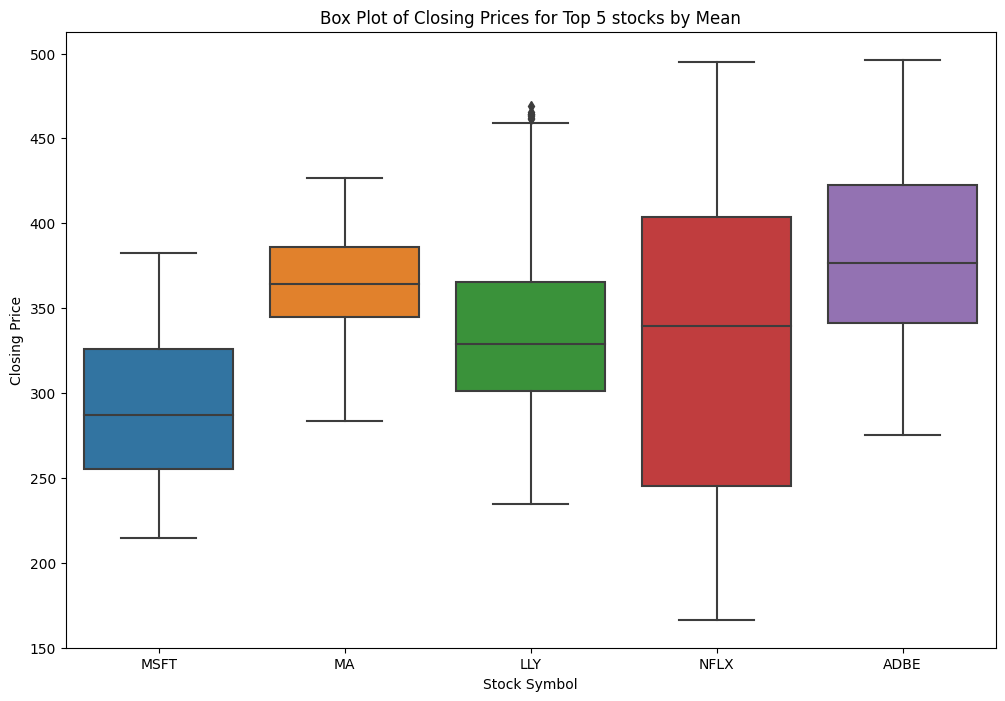

In [18]:
top_symbols = data.groupby('symbol')['close'].mean().nlargest(5).index
data['symbol'].value_counts().head(5).index

# Filter the data to only include the top 5 symbols
top_symbols_data = data[data['symbol'].isin(top_symbols)]

# Create box plots for 'Close' prices of the top 5 symbols to compare distributions
plt.figure(figsize=(12, 8))
sns.boxplot(x='symbol', y='close', data=top_symbols_data)
plt.title("Box Plot of Closing Prices for Top 5 stocks by Mean")
plt.xlabel("Stock Symbol")
plt.ylabel("Closing Price")
plt.show()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14293 entries, 0 to 15029
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date       14293 non-null  datetime64[ns, UTC]
 1   symbol     14293 non-null  object             
 2   open       14293 non-null  float64            
 3   high       14293 non-null  float64            
 4   low        14293 non-null  float64            
 5   close      14293 non-null  float64            
 6   adj_close  14293 non-null  float64            
 7   volume     14293 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), object(1)
memory usage: 1005.0+ KB


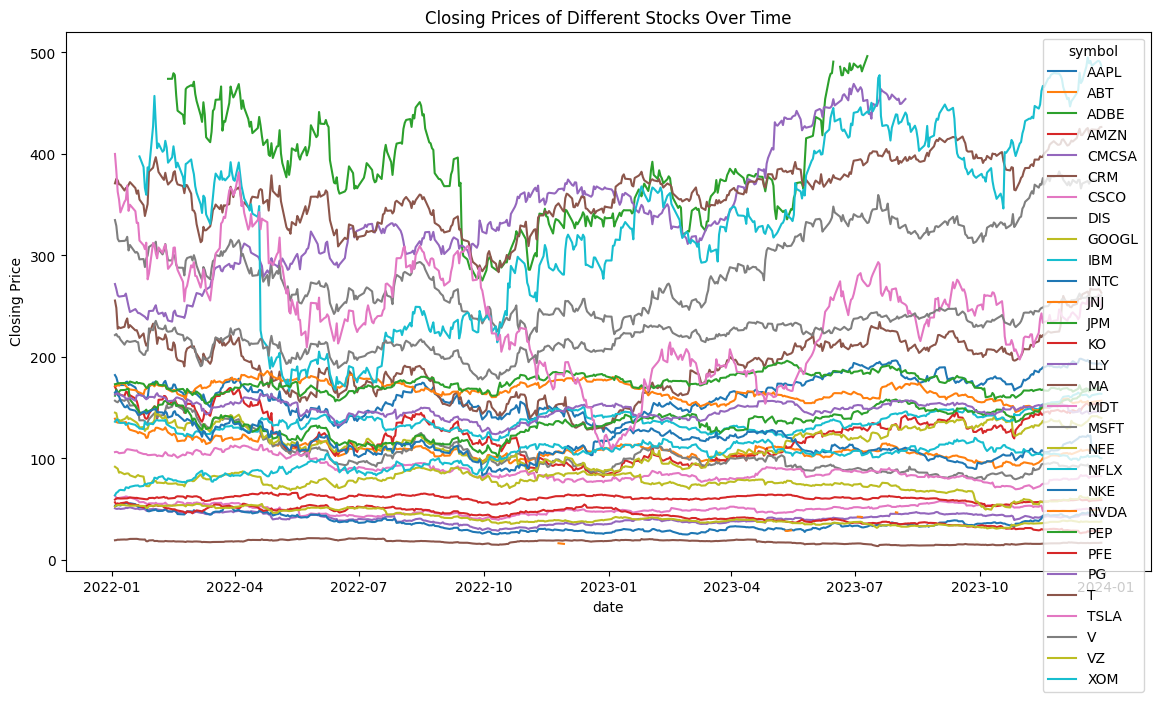

In [20]:
# Assuming 'Date' is the date column and 'Stock' indicates different stocks
data['date'] = pd.to_datetime(data['date'])

# Pivot the data to have stocks as columns
closing_prices = data.pivot(index='date', columns='symbol', values='close')

# Plot the data
plt.figure(figsize=(14, 7))
for stock in closing_prices.columns:
    plt.plot(closing_prices.index, closing_prices[stock], label=stock)
plt.title('Closing Prices of Different Stocks Over Time')
plt.xlabel('date')
plt.ylabel('Closing Price')
plt.legend(title='symbol')
plt.show()


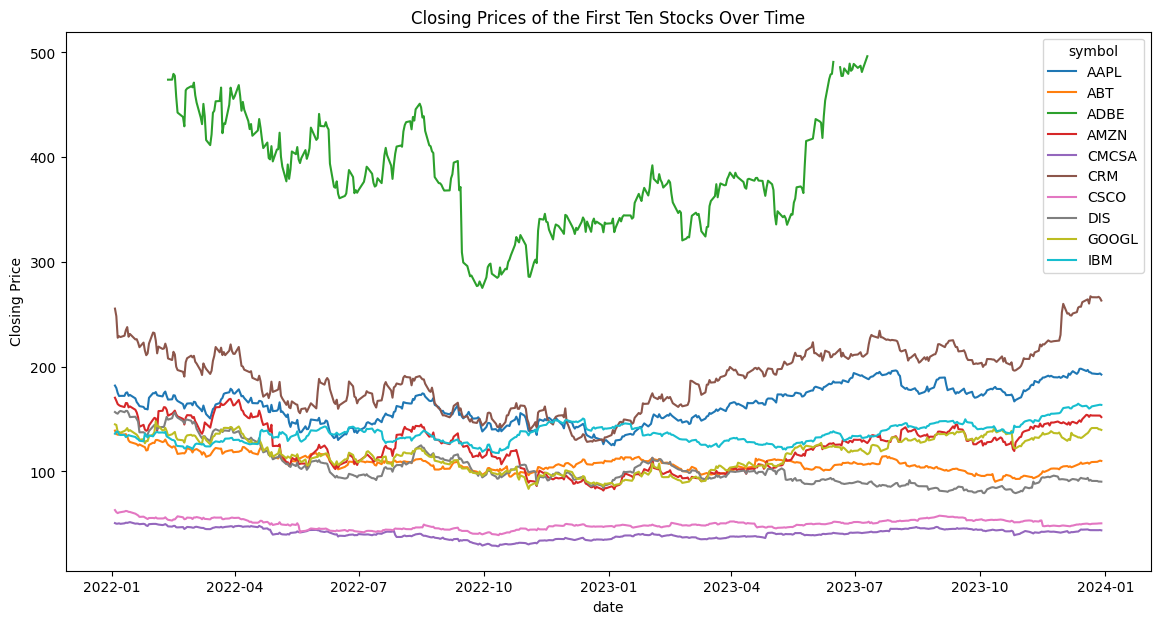

In [21]:
#for the first ten stocks
closing_prices = data.pivot(index='date', columns='symbol', values='close')

# Plot the data
plt.figure(figsize=(14, 7))
for stock in closing_prices.columns[:10]:
    plt.plot(closing_prices.index, closing_prices[stock], label=stock)
plt.title('Closing Prices of the First Ten Stocks Over Time')
plt.xlabel('date')
plt.ylabel('Closing Price')
plt.legend(title='symbol')
plt.show()



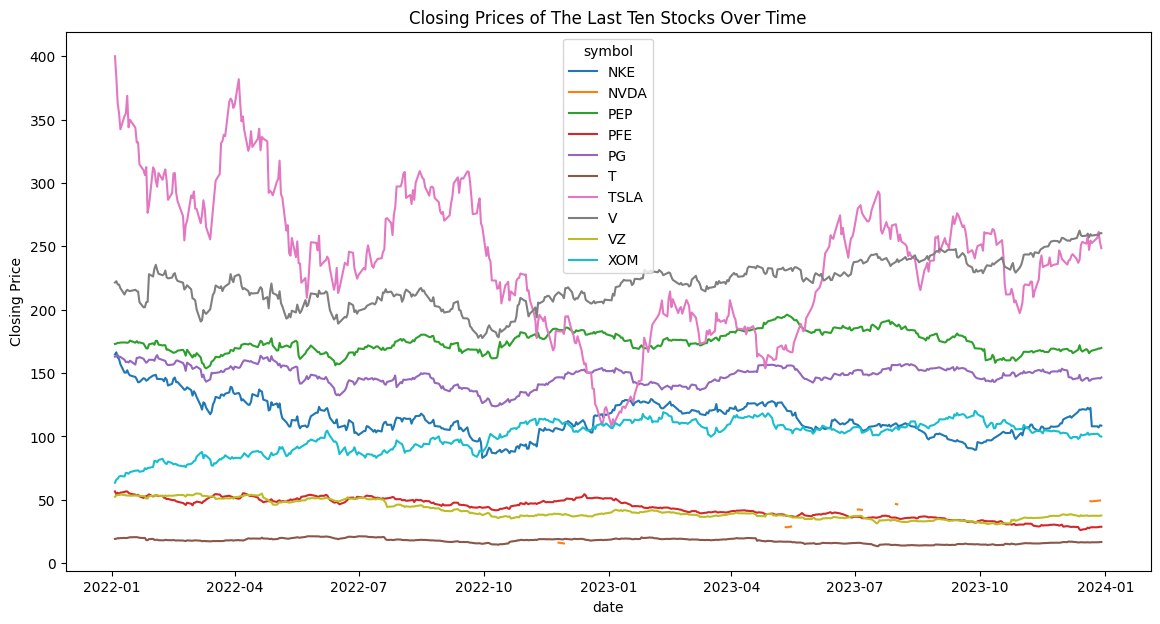

In [22]:
# for the last 10
closing_prices = data.pivot(index='date', columns='symbol', values='close')

# Plot the data
plt.figure(figsize=(14, 7))
for stock in closing_prices.columns[20:30]:
    plt.plot(closing_prices.index, closing_prices[stock], label=stock)
plt.title('Closing Prices of The Last Ten Stocks Over Time')
plt.xlabel('date')
plt.ylabel('Closing Price')
plt.legend(title='symbol')
plt.show()


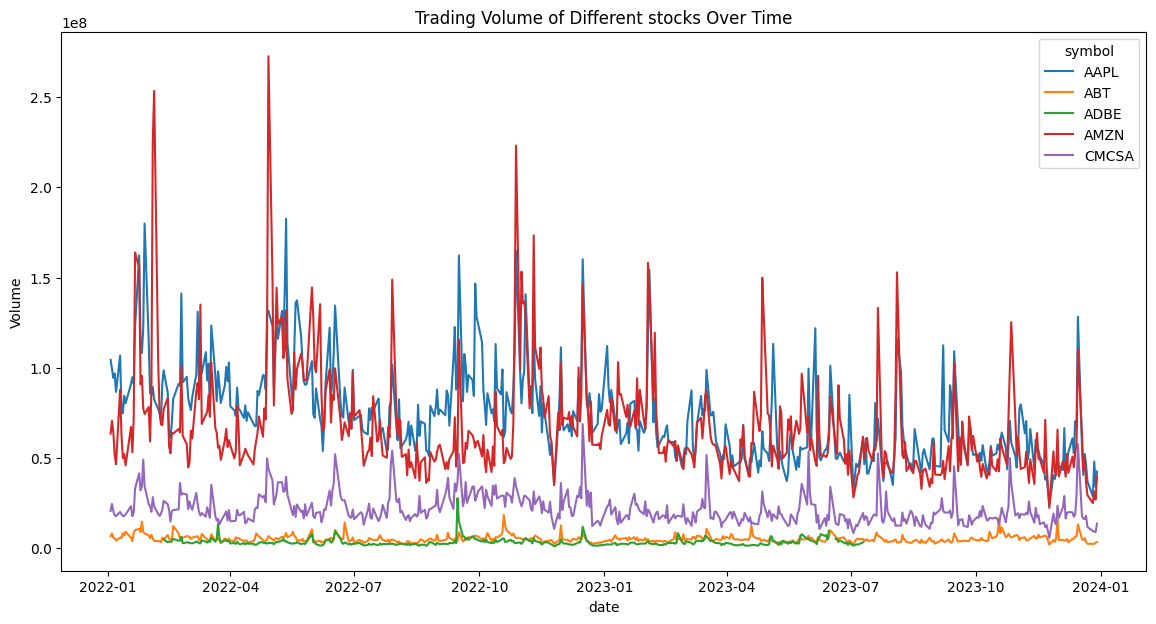

In [23]:
#stock volume over time
volumes = data.pivot(index='date', columns='symbol', values='volume')

# Plot
plt.figure(figsize=(14, 7))
for symbol in volumes.columns[:5]:
    plt.plot(volumes.index, volumes[symbol], label=symbol)
plt.title('Trading Volume of Different stocks Over Time')
plt.xlabel('date')
plt.ylabel('Volume')
plt.legend(title='symbol')
plt.show()


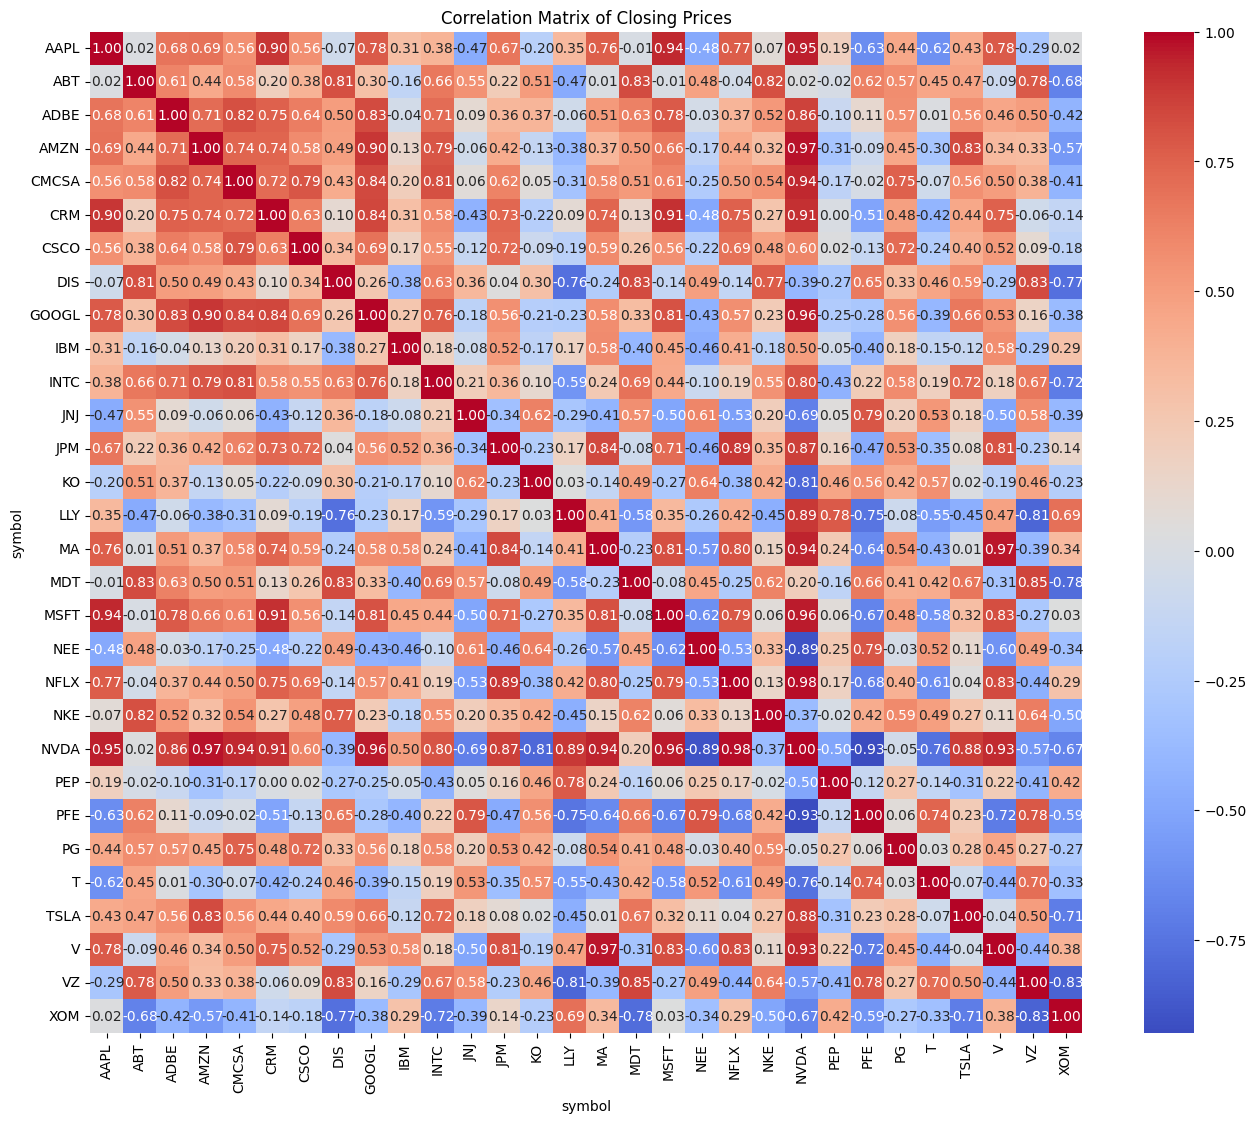

In [24]:
# Calculate the correlation matrix
corr_matrix = closing_prices.corr()

# Plot heatmap
plt.figure(figsize=(16, 13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Closing Prices')
plt.show()


## FEATURE ENGINEERING

In [25]:
data['daily_return'] = data.groupby('symbol')['close'].pct_change()

In [26]:
volatility = data.groupby('symbol')['daily_return'].std()

In [27]:
risk_levels = volatility.reset_index()
risk_levels.columns = ['symbol', 'volatility'] 

In [28]:
risk_levels.head()

,symbol,volatility
0,AAPL,0.018314
1,ABT,0.014804
2,ADBE,0.026418
3,AMZN,0.026819
4,CMCSA,0.017081


In [29]:
low_risk_threshold = volatility.quantile(0.33)
high_risk_threshold = volatility.quantile(0.67)

risk_levels['risk_level'] = pd.cut(risk_levels['volatility'],
                                   bins=[0, low_risk_threshold, high_risk_threshold, volatility.max()],
                                   labels=['Low Risk', 'Medium Risk', 'High Risk'])

In [30]:
final_data = pd.merge(risk_levels, data, on='symbol', how='inner')

final_data['risk_level'].value_counts()

risk_level
Low Risk       5010
Medium Risk    4909
High Risk      4374
Name: count, dtype: int64

In [31]:
final_data.head()

,symbol,volatility,risk_level,date,open,high,low,close,adj_close,volume,daily_return
0,AAPL,0.018314,Medium Risk,2022-01-03 00:00:00+00:00,177.830002,182.880005,177.710007,182.009995,179.273605,104487900.0,NaN
1,AAPL,0.018314,Medium Risk,2022-01-04 00:00:00+00:00,182.630005,182.940002,179.119995,179.699997,176.998337,99310400.0,-0.012692
2,AAPL,0.018314,Medium Risk,2022-01-05 00:00:00+00:00,179.610001,180.169998,174.639999,174.919998,172.290207,94537600.0,-0.026600
3,AAPL,0.018314,Medium Risk,2022-01-06 00:00:00+00:00,172.699997,175.300003,171.639999,172.000000,169.414108,96904000.0,-0.016693
4,AAPL,0.018314,Medium Risk,2022-01-07 00:00:00+00:00,172.889999,174.139999,171.029999,172.169998,169.581558,86709100.0,0.000988


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [33]:
final_data.isna().sum()

symbol           0
volatility       0
risk_level       0
date             0
open             0
high             0
low              0
close            0
adj_close        0
volume           0
daily_return    30
dtype: int64

In [34]:
final_data.dropna(subset=['daily_return'], inplace=True)

In [35]:
X = final_data[['daily_return', 'close', 'volatility']]
y = final_data['risk_level']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00       897
    Low Risk       1.00      1.00      1.00       953
 Medium Risk       1.00      1.00      1.00      1003

    accuracy                           1.00      2853
   macro avg       1.00      1.00      1.00      2853
weighted avg       1.00      1.00      1.00      2853



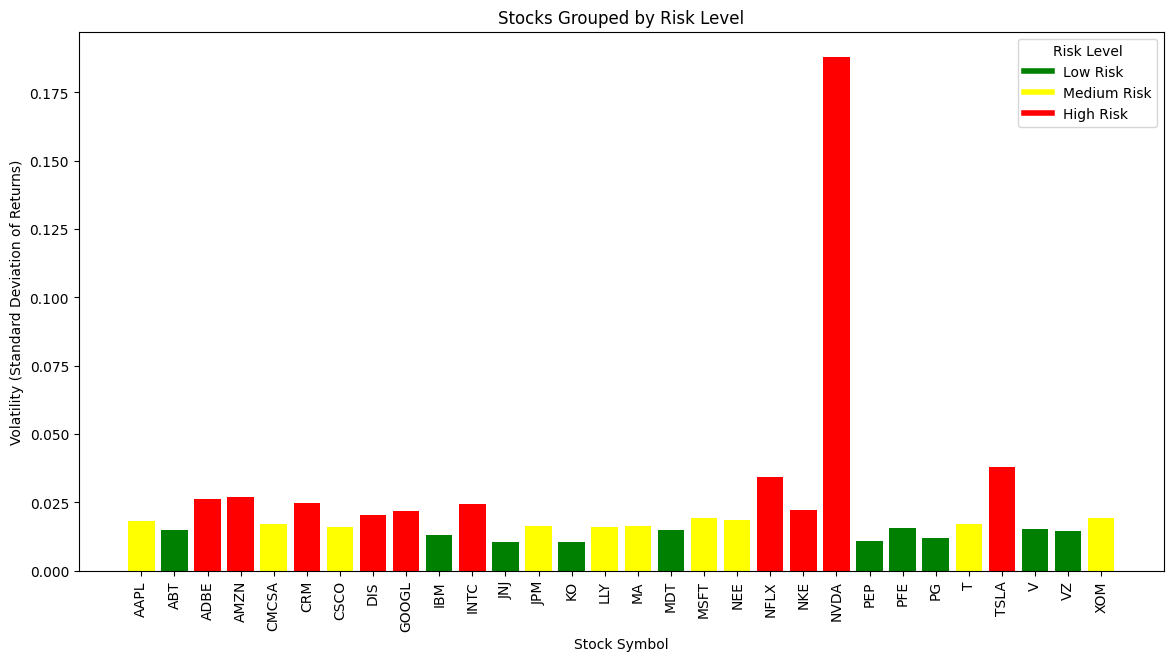

In [39]:
plt.figure(figsize=(14, 7))
color_map = {'Low Risk': 'green', 'Medium Risk': 'yellow', 'High Risk': 'red'}
bars = plt.bar(final_data['symbol'], final_data['volatility'], color=final_data['risk_level'].map(color_map))

legend_labels = [plt.Line2D([0], [0], color=color, lw=4) for color in color_map.values()]
plt.legend(legend_labels, color_map.keys(), title="Risk Level")

plt.xlabel("Stock Symbol")
plt.ylabel("Volatility (Standard Deviation of Returns)")
plt.title("Stocks Grouped by Risk Level")
plt.xticks(rotation=90)
plt.show()